In [119]:
import cv2
import pandas as pd
import numpy as np
import os
import time
from matplotlib import pyplot as plt


In [120]:
def Thresholding(image):
  hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
  hue = hsv[:,:,0]
  
  # lower_gray = np.array([0, 0, 0])
  # upper_gray = np.array([220, 220, 220])

  # lower_blue = np.array([0, 0, 112])
  # upper_blue = np.array([224,255,255])

  lower_gray = np.array([0, 0, 0])
  upper_gray = np.array([180, 180, 180])

  lower_blue = np.array([100, 50, 50])
  upper_blue = np.array([130, 255, 255])


  lower_white = np.array([100, 100, 100])
  upper_white = np.array([255, 255, 255])
  # lower_blue = np.array([100, 50, 50])
  # upper_blue = np.array([140, 255, 255])

  # thresholdValue, thres = cv2.threshold(hue ,190, 255, cv2.THRESH_BINARY +  cv2.THRESH_OTSU)

  mask_blue = cv2.inRange(hsv, lower_blue, upper_blue)
  thres = cv2.inRange(hsv, lower_white, upper_white)
  mask_gray = cv2.inRange(hsv, lower_gray, upper_gray)

  # print(mask_white)
  

  final_mask = cv2.bitwise_or(thres, cv2.bitwise_or(mask_gray, mask_blue))


  result = cv2.bitwise_and(image, image, mask=final_mask)

  return result, mask_blue, thres, mask_gray;

In [121]:
def RGBExtraction(img):

    height, width, _ = img.shape

    total_r = 0
    total_g = 0
    total_b = 0
    total_valid_pixels = 0 

    for y in range(height):
        for x in range(width):
            b, g, r = img[y, x]
            if not (b == 0 and g == 0 and r == 0):
                total_r += np.uint32(r)
                total_g += np.uint32(g)
                total_b += np.uint32(b) 
                total_valid_pixels += 1

    avg_r = round(total_r / total_valid_pixels) if total_valid_pixels != 0 else 0
    avg_g = round(total_g / total_valid_pixels) if total_valid_pixels != 0 else 0
    avg_b = round(total_b / total_valid_pixels) if total_valid_pixels != 0 else 0

    print(f"Rata-rata warna:\nR: {avg_r}, G: {avg_g}, B: {avg_b}\n")

    return [avg_r, avg_g, avg_b]


Proses 1
Rata-rata warna:
R: 85, G: 130, B: 192

375413
443946
27762


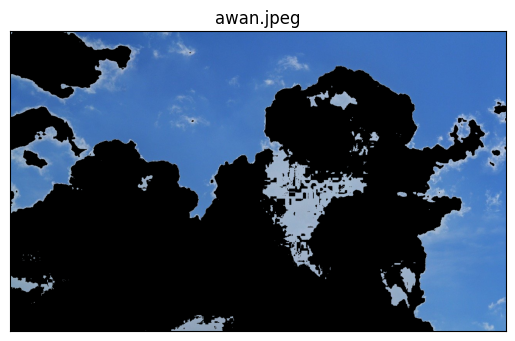

In [122]:
import glob

rgb_results = []
iteration  = 0


# dataset = "./Testing_Weather_Dataset/*.*"
# dataset = "./Training_Weather_Dataset/*.*"
dataset = "./test/*.*"
file_list = sorted(glob.glob(dataset))

for imageFile in file_list:
    if (iteration >= 5):
        break
    iteration += 1

 
    print(f"Proses {iteration}")
    img = cv2.imread(imageFile)

    result, mask_blue, thres, mask_gray = Thresholding(img)

    rgb_values = RGBExtraction(result)
    file_name = os.path.basename(imageFile)
    rgb_values.insert(0, file_name)

    gray_pixels = cv2.countNonZero(mask_gray)
    blue_pixels = cv2.countNonZero(mask_blue)
    white_pixels = cv2.countNonZero(thres)

    print(white_pixels)
    print(blue_pixels)
    print(gray_pixels)

    if "Training" in dataset:
        if (white_pixels > blue_pixels and white_pixels > gray_pixels) or (white_pixels < blue_pixels and blue_pixels > gray_pixels):
            rgb_values[4:8] = [blue_pixels, gray_pixels, white_pixels, "Cerah"]
        else:
            rgb_values[4:8] = [blue_pixels, gray_pixels, white_pixels, "Mendung"]
        rgb_values.insert(8, time.asctime(time.localtime(time.time())))
    else:
        rgb_values[4:7] = [blue_pixels, gray_pixels, white_pixels]
        rgb_values.insert(7, time.asctime(time.localtime(time.time())))

    rgb_results.append(rgb_values)

    rgb_img = cv2.cvtColor(result, cv2.COLOR_BGR2RGB)
    plt.imshow(rgb_img)

    plt.xticks([])
    plt.yticks([])
    plt.title(file_name)

    plt.show()

if "Training" in dataset:
    df = pd.DataFrame(rgb_results, columns=["Nama File", "Red", "Green", "Blue", "Banyak Pixel Biru", "Banyak Pixel Abu-Abu", "Banyak Pixel Putih", "Kondisi Cuaca", "Waktu"])
    excelFileName = "train.csv"
else:
    df = pd.DataFrame(rgb_results, columns=["Nama File", "Red", "Green", "Blue", "Banyak Pixel Biru", "Banyak Pixel Abu-Abu", "Banyak Pixel Putih", "Waktu"])
    excelFileName = "test.csv"

df.to_csv(excelFileName, index=False)

In [123]:
fandango = pd.read_csv(excelFileName)
fandango.head(20)

,Nama File,Red,Green,Blue,Banyak Pixel Biru,Banyak Pixel Abu-Abu,Banyak Pixel Putih,Waktu
0,awan.jpeg,85,130,192,443946,27762,375413,Sun Apr 28 16:28:17 2024
